In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

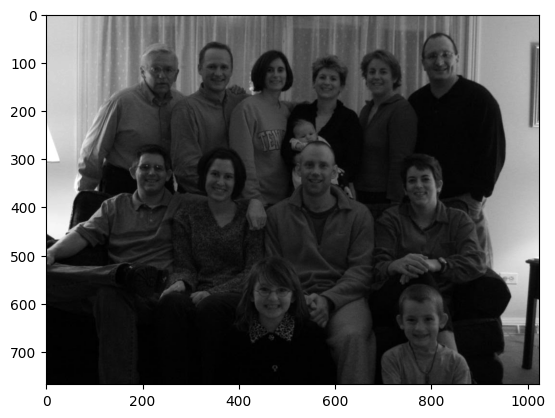

In [13]:
path = "./img1.jpg"
image = cv2.imread(path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")

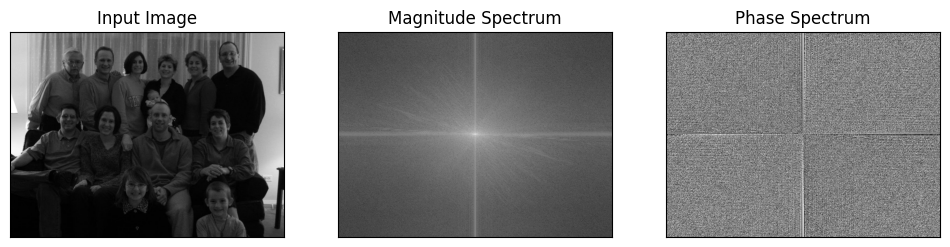

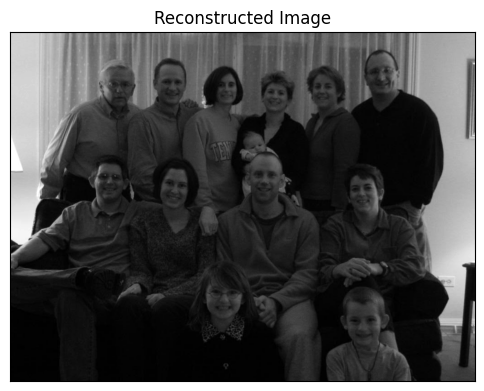

In [16]:
dft = cv2.dft(np.float32(gray), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)


magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]) + 1)
phase_spectrum = np.arctan2(dft_shift[:, :, 1], dft_shift[:, :, 0])
dft_ishift = np.fft.ifftshift(dft_shift)
img_reconstructed = cv2.idft(dft_ishift)
img_reconstructed = cv2.magnitude(img_reconstructed[:, :, 0], img_reconstructed[:, :, 1])
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title('Input Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(phase_spectrum, cmap='gray')
plt.title('Phase Spectrum')
plt.xticks([]), plt.yticks([])

plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(img_reconstructed, cmap='gray')
plt.title('Reconstructed Image')
plt.xticks([]), plt.yticks([])
plt.show()



In [19]:
real = dft[:, :, 0]
imaginary = dft[:, :, 1]

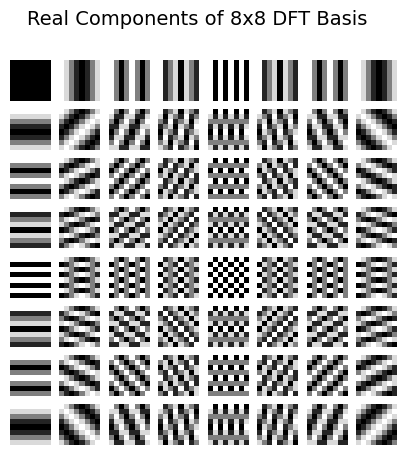

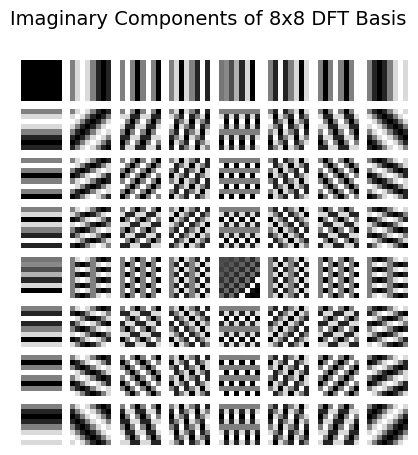

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def dft_basis(N):
    basis_real = np.zeros((N, N, N, N))
    basis_imag = np.zeros((N, N, N, N))

    for u in range(N):
        for v in range(N):
            for x in range(N):
                for y in range(N):
                    angle = 2 * np.pi * ((u * x / N) + (v * y / N))
                    basis_real[u, v, x, y] = np.cos(angle)
                    basis_imag[u, v, x, y] = np.sin(angle)

    return basis_real, basis_imag

N = 8

basis_real, basis_imag = dft_basis(N)

fig, axes = plt.subplots(N, N, figsize=(5, 5))
fig.suptitle("Real Components of 8x8 DFT Basis", fontsize=14)
for u in range(N):
    for v in range(N):
        ax = axes[u, v]
        ax.imshow(basis_real[u, v], cmap="gray", origin="upper")
        ax.axis("off")
plt.show()

fig, axes = plt.subplots(N, N, figsize=(5, 5))
fig.suptitle("Imaginary Components of 8x8 DFT Basis", fontsize=14)
for u in range(N):
    for v in range(N):
        ax = axes[u, v]
        ax.imshow(basis_imag[u, v], cmap="gray", origin="upper")
        ax.axis("off")
plt.show()


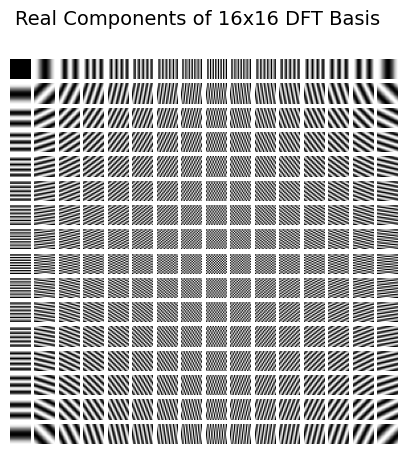

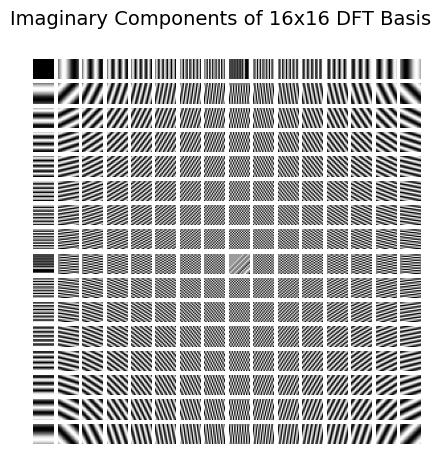

In [31]:
N = 16

basis_real, basis_imag = dft_basis(N)

fig, axes = plt.subplots(N, N, figsize=(5, 5))
fig.suptitle("Real Components of 16x16 DFT Basis", fontsize=14)
for u in range(N):
    for v in range(N):
        ax = axes[u, v]
        ax.imshow(basis_real[u, v], cmap="gray", origin="upper")
        ax.axis("off")
plt.show()

fig, axes = plt.subplots(N, N, figsize=(5, 5))
fig.suptitle("Imaginary Components of 16x16 DFT Basis", fontsize=14)
for u in range(N):
    for v in range(N):
        ax = axes[u, v]
        ax.imshow(basis_imag[u, v], cmap="gray", origin="upper")
        ax.axis("off")
plt.show()


In [33]:
image1 = cv2.imread('im1.png')
image1.shape

(795, 1589, 3)

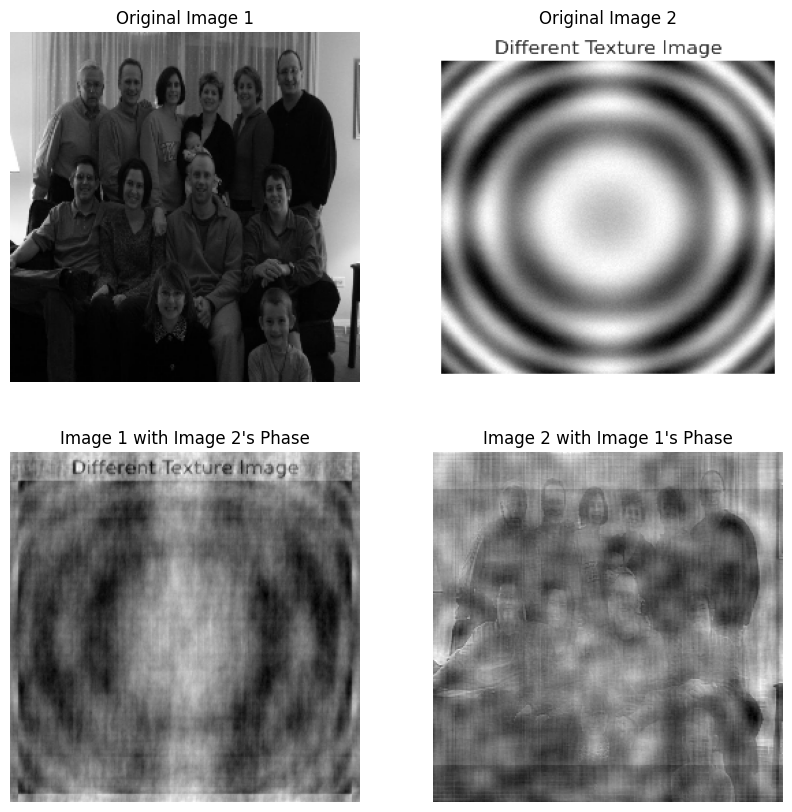

In [37]:

def resize_image(image, size=(256, 256)):
    return cv2.resize(image, size, interpolation=cv2.INTER_LINEAR)

def swap_phase(image1, image2):
    img1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY) if len(image1.shape) == 3 else image1
    img2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY) if len(image2.shape) == 3 else image2
    
    img1_gray = resize_image(img1_gray)
    img2_gray = resize_image(img2_gray)
    
    dft1 = np.fft.fft2(img1_gray)
    dft2 = np.fft.fft2(img2_gray)
    
    mag1, phase1 = np.abs(dft1), np.angle(dft1)
    mag2, phase2 = np.abs(dft2), np.angle(dft2)
    
    swapped_dft1 = mag1 * np.exp(1j * phase2)
    swapped_dft2 = mag2 * np.exp(1j * phase1)
    
    reconstructed1 = np.fft.ifft2(swapped_dft1).real
    reconstructed2 = np.fft.ifft2(swapped_dft2).real
    
    return reconstructed 1, reconstructed2

image1 = cv2.imread('img1.jpg')
image2 = cv2.imread('im2.png')

reconstructed1, reconstructed2 = swap_phase(image1, image2)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(cv2.cvtColor(resize_image(image1), cv2.COLOR_BGR2RGB))
axes[0, 0].set_title("Original Image 1")
axes[0, 0].axis("off")

axes[0, 1].imshow(cv2.cvtColor(resize_image(image2), cv2.COLOR_BGR2RGB))
axes[0, 1].set_title("Original Image 2")
axes[0, 1].axis("off")

axes[1, 0].imshow(reconstructed1, cmap="gray")
axes[1, 0].set_title("Image 1 with Image 2's Phase")
axes[1, 0].axis("off")

axes[1, 1].imshow(reconstructed2, cmap="gray")
axes[1, 1].set_title("Image 2 with Image 1's Phase")
axes[1, 1].axis("off")

plt.show()
